# Clustering with Python
credits: https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03

## Making Imports

In [44]:
# Importing Modules
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Loading Dataset

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


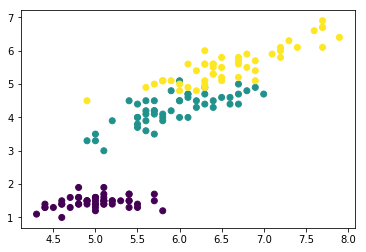

In [22]:
# Loading dataset
iris_df = datasets.load_iris()

X = iris_df.data
y = iris_df.target

# Features
print(iris_df.feature_names)

# Target Names
print(iris_df.target_names)
label = {0: 'red', 1: 'blue', 2: 'green'}

# Dataset Slicing
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 2]  # Sepal Width

# Plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)

## K-Means 

K means is an iterative clustering algorithm that aims to find local maxima in each iteration. Initially desired number of clusters are chosen. Since we know that there are 3 classes involved, we program the algorithm to group the data into 3 classes, by passing the parameter “n_clusters” into our KMeans model. Now randomly three points(inputs) are assigned into three cluster. Based on the centroid distance between each points the next given inputs are segregated into respected clusters. Now, re-computing the centroids for all the clusters.

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represent.

We import KMeans model from sklearn library, fit out features and predict.

In [151]:
from sklearn.cluster import KMeans
n_clusters = 3

# Declaring Model
model = KMeans(n_clusters=n_clusters, verbose = 0) # The number of classes in your dataset

# Fitting Model
model.fit(X) 

# Predicitng a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(X) # Return the cluster of each register

# Printing Predictions
print(predicted_label)
print(all_predictions)
print (y)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [152]:
from collections import Counter
y = np.array(y)
ix_cluster = dict()
cluster_count_dict = dict()
for cluster in np.unique(model.labels_):
    ix_cluster[cluster] = np.where(all_predictions == cluster)[0]
    cluster_count_dict[cluster] = dict(Counter(y[ix_cluster[cluster]]))

In [153]:
cluster_count_dict

{0: {1: 2, 2: 36}, 1: {0: 50}, 2: {1: 48, 2: 14}}

In [154]:

cluster_count = np.zeros([n_clusters, len(np.unique(y))])
for cluster in np.unique(model.labels_):
    for target_label in np.unique(y):
        try:
            cluster_count[cluster][target_label] = cluster_count_dict[cluster][target_label]
        except:
            pass
cluster_count


array([[ 0.,  2., 36.],
       [50.,  0.,  0.],
       [ 0., 48., 14.]])

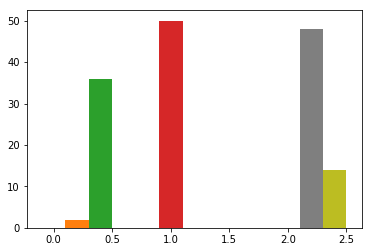

In [155]:
width = 0.2
for cluster in np.unique(model.labels_):
    for target_label in np.unique(y):
        plt.bar(x = cluster+target_label*width, height = cluster_count[cluster][target_label], width = width) 
        #plt.bar(x = cluster, height = cluster_count[3][1], width = width)
        #plt.bar(x = cluster+width, height = cluster_count[3][2], width = width)

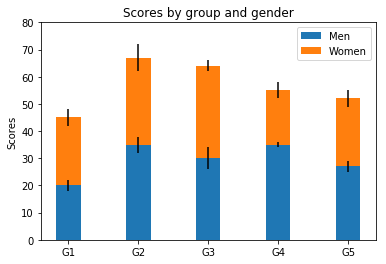

In [133]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [156]:
df = pd.DataFrame(cluster_count)
range(df.shape[0])

range(0, 3)

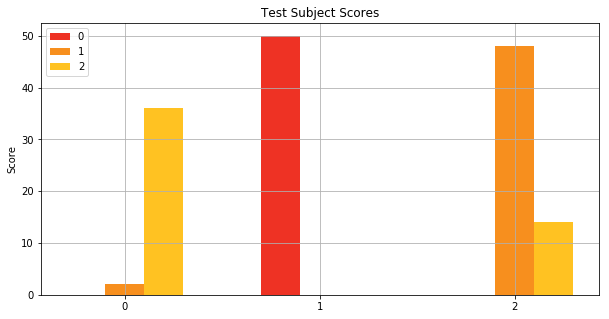

In [157]:
# Setting the positions and width for the bars
pos = list(range(df.shape[0])) 
width = 0.2
alpha = 1
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df[0], 
        # of width
        width, 
        # with alpha 0.5
        alpha=alpha, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label='0') 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df[1],
        # of width
        width, 
        # with alpha 0.5
        alpha=alpha, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label='1') 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df[2], 
        # of width
        width, 
        # with alpha 0.5
        alpha=alpha, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label='2') 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(range(df.shape[0]))

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['0', '1', '2'], loc='upper left')
plt.grid()
plt.show()

## t-SNE clustering
It is one of the unsupervised learning method for visualisation. t-SNE stands for t-distributed stochastic neighbor embedding. It maps high dimensional space into a 2 or 3 dimensional space which can be visualised. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

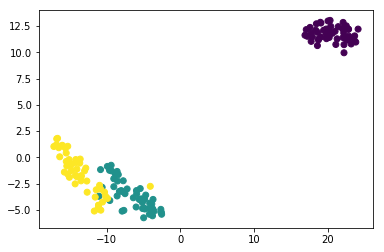

In [12]:
from sklearn.manifold import TSNE
# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(iris_df.data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

## DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used as an replacement to K-means in predictive analytics. It doesn’t require that you input the number of clusters in order to run. But in exchange, you have to tune two other parameters.

The scikit-learn implementation provides a default for the eps and min_samples parameters, but you’re generally expected to tune those. The eps parameter is the maximum distance between two data points to be considered in the same neighborhood. The min_samples parameter is the minimum amount of data points in a neighborhood to be considered a cluster.


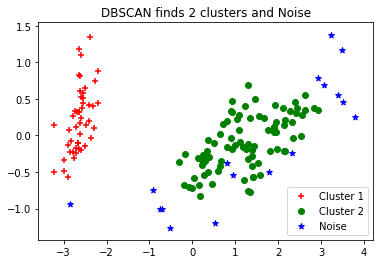

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(iris_df.data)

# Transoring Using PCA
pca = PCA(n_components=2).fit(iris_df.data)
pca_2d = pca.transform(iris_df.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()